# Probability-insighter
https://github.com/alvason/probability-insighter

### Binomial random distribution

In [1]:
'''
author: Alvason Zhenhua Li
date:   03/19/2015
'''
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import os

import alva_machinery_probability as alva

AlvaFontSize = 23
AlvaFigSize = (16, 6)
numberingFig = 0
# for saving figure
dir_path = '/Users/al/Desktop/GitHub/probability-insighter/figure'
file_name = 'binomial-distribution'
###############
import datetime
previous_running_time = datetime.datetime.now()
print ('Previous running time is {:}').format(previous_running_time)

Previous running time is 2016-05-02 09:29:15.097931
Previous running time is 2016-05-02 09:29:15.098165


### Probability of only one member with a unique face (k = 1 from m-dice of b-face)
### $ Pr(k = 1 | b, m) = m (b - 1)^{(m - k)} $

### Probability of only two members with a unique face (k = 2 from m-dice of b-face)
### $ Pr(k = 2 | b, m) = \frac{m!}{k!(m - k)!} (b - 1)^{(m - k)} $

In [2]:
# 1'23456'---1 work_way
# 1'23456'---1 work_way 
# '1'23456---5 work_way
# '1'23456---5 work_way
# '1'23456---5 work_way

[5.153522 second -------------------- 100% ]
total_work_way = [1, 10, 75, 500, 2250, 3702, 3890, 3716, 3467, 3255, 2876, 2654, 2430, 2108, 1960, 1701, 1547, 1297, 1205, 990, 918, 762, 722, 636, 522, 450, 396, 359, 283]
total_posi_way = [6, 36, 216, 1295, 5655, 8982, 9829, 9966, 9996, 10000, 9999, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]
sum_of_all_probability = 5.82306575021


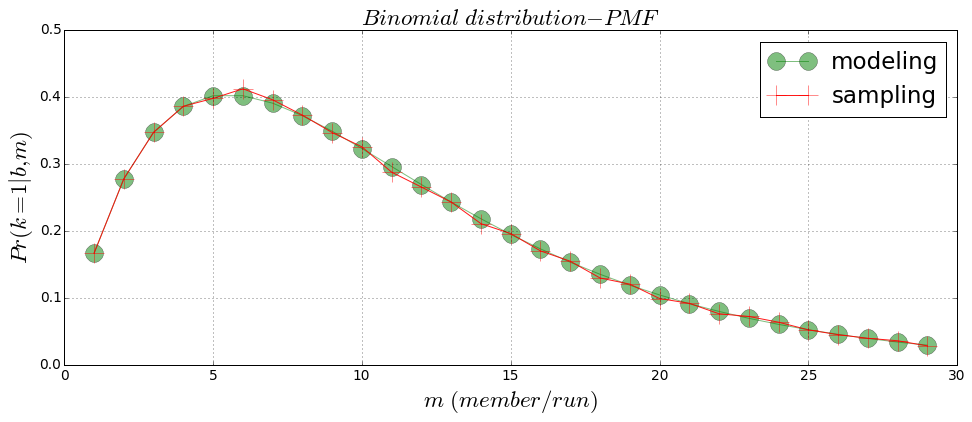

In [9]:
def binomial_distribution_k(base = 6, digit = 2, wanted = 0, total_sampling = 10000, k = 2):
    total_run = total_sampling
    run_way_all = np.zeros([total_run, digit])
    for i in range(total_run):
        run_way = []
        for rn in range(digit):
            output_value = int(base * np.random.random())
            run_way.append(output_value)
        run_way_all[i] = run_way
    way_all = pd.DataFrame(run_way_all, columns = ['rolling_' + str(i) for i in np.arange(digit)])
    possible_way_all = way_all.drop_duplicates()
    # column with only one face_value
    work_way_all = pd.DataFrame()
    for rn in range(digit):
        aaa = possible_way_all[possible_way_all[[rn]].values == wanted]
        #print aaa
        if len(possible_way_all.columns) > 1:
            bbb = aaa.drop(aaa.columns[rn], axis = 1)
            #print bbb
            bbb = bbb[(bbb != wanted)].dropna()
            #print bbb
            ccc = aaa.loc[bbb.index]
            #print ccc
            work_way_all = work_way_all.append(ccc)
        else:
            work_way_all = work_way_all.append(aaa)
    #print work_way_all
    total_possible_way = len(possible_way_all)
    total_work_way = len(work_way_all)
    probability = float(total_work_way) / total_possible_way
    return (probability, total_work_way, total_possible_way)

def binomial_distribution_1(base = 6, digit = 2, wanted = 0, total_sampling = 10000):
    total_run = total_sampling
    run_way_all = np.zeros([total_run, digit])
    for i in range(total_run):
        run_way = []
        for rn in range(digit):
            output_value = int(base * np.random.random())
            run_way.append(output_value)
        run_way_all[i] = run_way
    way_all = pd.DataFrame(run_way_all, columns = ['rolling_' + str(i) for i in np.arange(digit)])
    possible_way_all = way_all.drop_duplicates()
    # column with only one face_value
    work_way_all = pd.DataFrame()
    for rn in range(digit):
        aaa = possible_way_all[possible_way_all[[rn]].values == wanted]
        #print aaa
        if len(possible_way_all.columns) > 1:
            bbb = aaa.drop(aaa.columns[rn], axis = 1)
            #print bbb
            bbb = bbb[(bbb != wanted)].dropna()
            #print bbb
            ccc = aaa.loc[bbb.index]
            #print ccc
            work_way_all = work_way_all.append(ccc)
        else:
            work_way_all = work_way_all.append(aaa)
    #print work_way_all
    total_possible_way = len(possible_way_all)
    total_work_way = len(work_way_all)
    probability = float(total_work_way) / total_possible_way
    return (probability, total_work_way, total_possible_way)

def base_digit_wanted(base = 6, digit = 2, wanted = 0, k = 1):
    base = float(base)
    digit = float(digit)
    wanted = float(wanted)
    total_possible_way = base**digit
    binomial_coefficient = float(alva.productA(digit)) / (alva.productA(k) * alva.productA(digit - k)) 
    total_work_way = binomial_coefficient * (base - 1)**(digit - 1)
    probability = total_work_way / total_possible_way
    return (probability, total_work_way, total_possible_way)

##########
baseN = 6
wantedN = 0
samplingN = 10**4
max_member = 30

xx = np.arange(1, max_member)
pp = []
total_work_way_all = []
total_posible_way_all = []
watching = alva.TimeWatch()
for i in xx:
    aaa = binomial_distribution_1(base = baseN, digit = i, wanted = wantedN, total_sampling = samplingN)
    p = aaa[0]
    total_work_way_all.append(aaa[1])
    total_posible_way_all.append(aaa[2])
    pp.append(p)
    watching.progressBar(1, i, len(xx))
print ('total_work_way = {:}'.format(total_work_way_all))
print ('total_posi_way = {:}'.format(total_posible_way_all))

###
xx_model = np.arange(1, max_member)
pp_model = []
for i in xx_model:
    p = base_digit_wanted(base = baseN, digit = i, wanted = wantedN)[0]
    pp_model.append(p)
print ('sum_of_all_probability = {:}'.format(np.sum(pp_model)))

# plotting1
figure = plt.figure(numberingFig, figsize = (16, 6))
plot1 = figure.add_subplot(1, 1, 1)
plot1.plot(xx_model, pp_model, marker ='o', markersize = 18
           , color = 'green', alpha = 0.5, label = 'modeling')
plt.plot(xx, pp, marker = '+', markersize = 20
         , color = 'red', alpha = 0.9, label = 'sampling')

plt.ylim(0, 0.5)
plt.title(r'$ Binomial \ distribution-PMF $', fontsize = AlvaFontSize)
plt.xlabel(r'$ m \ (member/run) $', fontsize = AlvaFontSize)
plt.ylabel(r'$ Pr(k = 1|b, m) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.grid(True)
plt.legend(fontsize = AlvaFontSize)
plt.show()

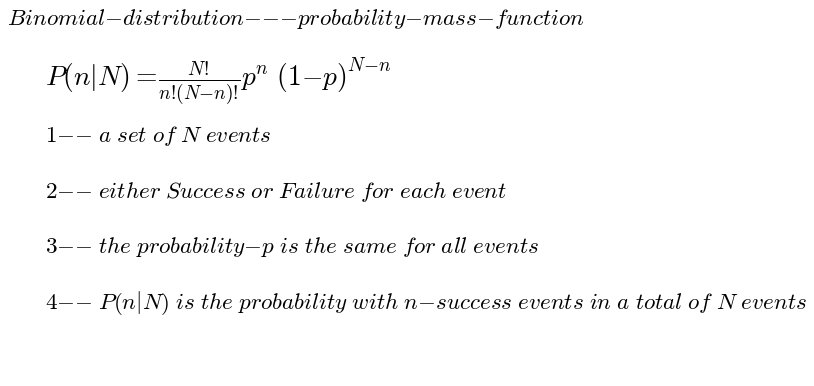

In [4]:
# plotting
figure_name = '-equation'
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(9, 6))
plt.axis('off')
plt.title(r'$ Binomial-distribution---probability-mass-function $',fontsize = AlvaFontSize)
plt.text(0, 5.0/6, r'$ P(n|N) = \frac{N!}{n!(N - n)!} p^n (1 - p)^{N - n} $', fontsize = 1.2*AlvaFontSize)
plt.text(0, 4.0/6, r'$ 1-- \ a \ set \ of \ N \ events $', fontsize = AlvaFontSize)
plt.text(0, 3.0/6, r'$ 2-- \ either \ Success \ or \ Failure \ for \ each \ event $', fontsize = AlvaFontSize)
plt.text(0, 2.0/6, r'$ 3-- \ the \ probability-p \ is \ the \ same \ for \ all \ events $', fontsize = AlvaFontSize)
plt.text(0, 1.0/6, r'$ 4-- \ P(n|N) \ is \ the \ probability \ with \ n-success \ events \ in \ a \ total \ of \ N \ events $',
         fontsize = AlvaFontSize)
plt.savefig(save_figure, dpi = 300)
plt.show()

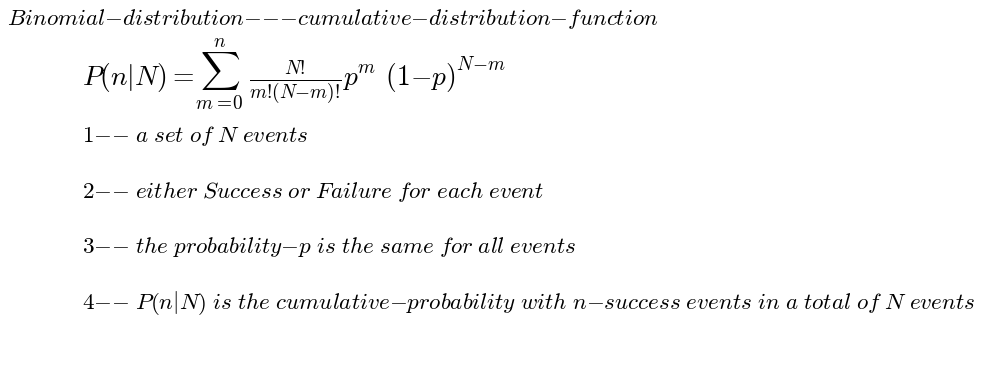

In [5]:
numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(9, 6))
plt.axis('off')
plt.title(r'$ Binomial-distribution---cumulative-distribution-function $',fontsize = AlvaFontSize)
plt.text(0, 5.0/6, r'$ P(n|N) = \sum_{m=0}^n \ \frac{N!}{m!(N - m)!} p^m (1 - p)^{N - m} $', fontsize = 1.2*AlvaFontSize)
plt.text(0, 4.0/6, r'$ 1-- \ a \ set \ of \ N \ events $', fontsize = AlvaFontSize)
plt.text(0, 3.0/6, r'$ 2-- \ either \ Success \ or \ Failure \ for \ each \ event $', fontsize = AlvaFontSize)
plt.text(0, 2.0/6, r'$ 3-- \ the \ probability-p \ is \ the \ same \ for \ all \ events $', fontsize = AlvaFontSize)
plt.text(0, 1.0/6, r'$ 4-- \ P(n|N) \ is \ the \ cumulative-probability \ with \ n-success \ events \ in \ a \ total \ of \ N \ events $',
         fontsize = AlvaFontSize)
plt.show()

('AlvaM =', 9.3326215443944102e+157)
('NumPy =', 9.3326215443944102e+157)
total-probability = 0.957609


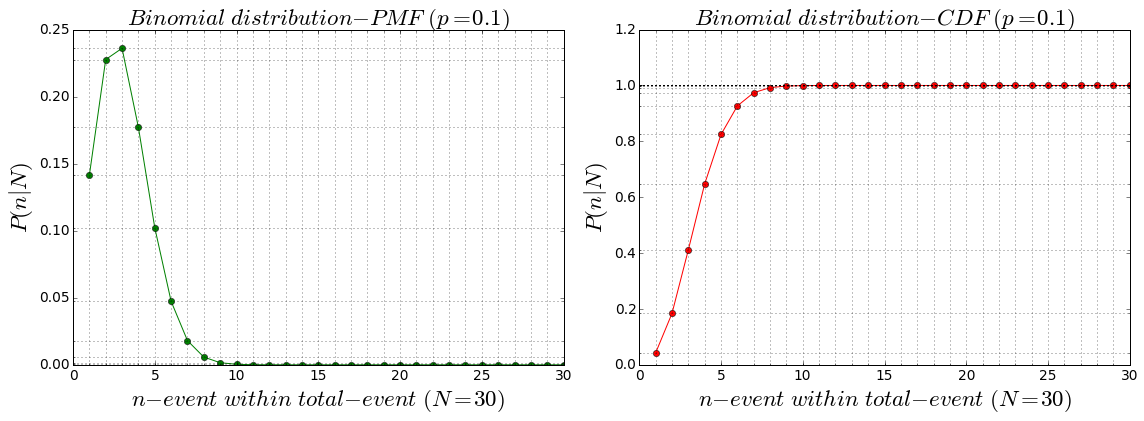

In [6]:
def AlvaProduct(i):
    if type(i) != np.ndarray:
        i = np.array([i])
    A_product = 0.0*i + 1
    for j in range(np.size(i)):
        for k in range(1, i[j] + 1):        
            A_product[j] = A_product[j]*k
    if np.size(i) == 1:
        A_product = A_product[0]
    return (A_product)

#testing
i = 100
print ('AlvaM =', AlvaProduct(i))
print ('NumPy =', np.prod(np.arange(1, i + 1), dtype=np.float64))


def AlvaBinomialD(i, N, p):
    B_distribution = 0.0*i
    B_distribution[:] = AlvaProduct(N)/(AlvaProduct(i[:])*AlvaProduct(N - i[:])) * p**i[:] * (1 - p)**(N - i[:])
    return (B_distribution)

def AlvaBinomialC(m, N, p, binomialD):
    B_C = 0.0*m
    for j in range(np.size(m)):
        for k in range(m[j]):
            i = np.arange(k + 1)
            B_distribution = binomialD(i, N, p)
        B_C[j] = B_C[j] + B_distribution.sum()
    return (B_C)

total_event = int(30)
i_event = np.arange(1, total_event + 1)
totalPoint_Input = total_event
probability_each = 0.1

binomial_D = AlvaBinomialD(i_event, total_event, probability_each)
print ('total-probability = {:f}'.format(binomial_D.sum()))
# plotting1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(i_event, binomial_D, marker ='o', color = 'green')
if totalPoint_Input < 100:
    plot1.set_xticks(i_event, minor = True) 
    plot1.set_yticks(binomial_D, minor = True) 
    plot1.grid(True, which = 'minor')
else:
    plot1.grid(True, which = 'major')
plt.title(r'$ Binomial \ distribution-PMF \ (p={:}) $'.format(probability_each), fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ within \ total-event \ (N={:}) $'.format(total_event), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(n|N) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
# plotting2
i_event = np.arange(1, total_event + 1)
binomial_C = AlvaBinomialC(i_event, total_event, probability_each, AlvaBinomialD)
plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(i_event, binomial_C, marker ='o', color = 'red')
if totalPoint_Input < 100:
    plot2.set_xticks(i_event, minor = True) 
    plot2.set_yticks(binomial_C, minor = True) 
    plot2.grid(True, which = 'minor')
else:
    plot2.grid(True, which = 'major')
plt.title(r'$ Binomial \ distribution-CDF \ (p={:}) $'.format(probability_each), fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ within \ total-event \ (N={:}) $'.format(total_event), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(n|N) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
    
figure.tight_layout()
plt.show()

('probability_each_list =', array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]))


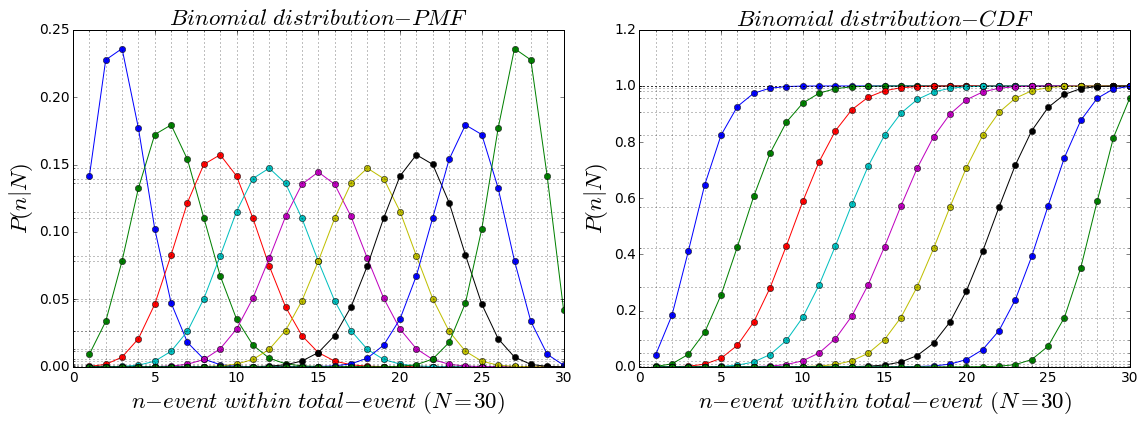

In [7]:
# plotting a list
number_list = 9
probability_each_list = np.arange(1, number_list + 1)*1.0/(number_list + 1)
print ('probability_each_list =', probability_each_list)

binomial_D_list = np.zeros([number_list, total_event])
for i in range(number_list):
    binomial_D_list[i] = AlvaBinomialD(i_event, total_event, probability_each_list[i])
#    print ('total-probability = {:f}'.format(binomial_D_list[i].sum()))
binomial_C_list = np.zeros([number_list, total_event])
for i in range(number_list):
    binomial_C_list[i] = AlvaBinomialC(i_event, total_event, probability_each_list[i], AlvaBinomialD)

# plotting
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(i_event, binomial_D_list.T, marker ='o')
if totalPoint_Input < 100:
    plot1.set_xticks(i_event, minor = True) 
    plot1.set_yticks(binomial_D_list[(number_list + 1)/2], minor = True) 
    plot1.grid(True, which = 'minor')
else:
    plot1.grid(True, which = 'major')
plt.title(r'$ Binomial \ distribution-PMF $', fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ within \ total-event \ (N={:}) $'.format(total_event), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(n|N) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 

plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(i_event, binomial_C_list.T, marker ='o')
if totalPoint_Input < 100:
    plot2.set_xticks(i_event, minor = True) 
    plot2.set_yticks(binomial_C_list[(number_list + 1)/2], minor = True) 
    plot2.grid(True, which = 'minor')
else:
    plot2.grid(True, which = 'major')
plt.title(r'$ Binomial \ distribution-CDF $', fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ within \ total-event \ (N={:}) $'.format(total_event), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(n|N) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 

figure.tight_layout()
plt.show()

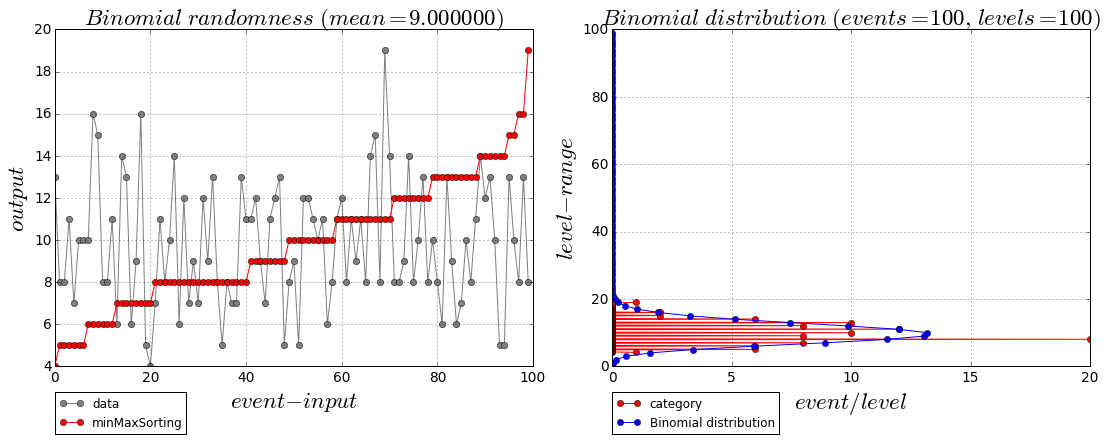

In [8]:
'''Binomial randomness --- Binomial distribution'''

total_event = int(100)
gInput = np.arange(total_event)
output_level = total_event
probability_peak = 0.1
randomSeed = np.random.binomial(output_level, probability_peak, total_event)

sumP = 0
for i in range(total_event):
    sumP = sumP + randomSeed[i]
meanP = sumP/(total_event)

totalLevel = int(total_event/1)
category = alva.AlvaLevel(randomSeed, totalLevel, False)
gLevel = category[0]
numberLevel = category[1]

binomial_D = total_event*AlvaBinomialD(np.arange(totalLevel), totalLevel, probability_peak)

# plotting
figure_name = ''
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(gInput, randomSeed, color = 'gray', marker = 'o', label = 'data')
plot1.plot(gInput, alva.AlvaMinMax(randomSeed), color = 'red', marker = 'o', label = 'minMaxSorting')
if total_event < 100:
    plot1.set_xticks(gInput, minor = True) 
    plot1.set_yticks(randomSeed, minor = True)
    plot1.grid(True, which = 'minor')
else:
    plot1.grid(True, which = 'major')
plt.title(r'$ Binomial \ randomness \ (mean = {:1.6f}) $'.format(meanP), fontsize = AlvaFontSize)
plt.xlabel(r'$ event-input $', fontsize = AlvaFontSize)
plt.ylabel(r'$ output $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.legend(loc = (0, -0.2))

plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(numberLevel, gLevel, color = 'red', marker = 'o', label = 'category') 
plot2.plot(binomial_D, np.arange(totalLevel), color = 'blue', marker = 'o', label = 'Binomial distribution') 
if total_event < 100:
    plot2.set_xticks(numberLevel, minor = True) 
    plot2.set_yticks(gLevel, minor = True)
    plot2.grid(True, which = 'minor')
else:
    plot2.grid(True, which = 'major')
plt.title(r'$ Binomial \ distribution \ (events = {ev:},\ levels = {le:}) $'.format(ev = total_event, le = totalLevel)
          , fontsize = AlvaFontSize)
plt.xlabel(r'$ event/level $', fontsize = AlvaFontSize)
plt.ylabel(r'$ level-range $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.legend(loc = (0, -0.2))

figure.tight_layout()
plt.savefig(save_figure, dpi = 300)
plt.show()